# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [40]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 612


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "q=" + city + "&appid=" + weather_api_key + "&units=" + units
   
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json() # YOUR CODE HERE

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                         "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bethel
Processing Record 2 of Set 1 | chonchi
Processing Record 3 of Set 1 | stanley
Processing Record 4 of Set 1 | port-aux-francais
Processing Record 5 of Set 1 | mineiros
Processing Record 6 of Set 1 | baiyin
Processing Record 7 of Set 1 | thompson
Processing Record 8 of Set 1 | petropavlovsk-kamchatsky
Processing Record 9 of Set 1 | bilibino
Processing Record 10 of Set 1 | gadzhiyevo
Processing Record 11 of Set 1 | santa elena de uairen
Processing Record 12 of Set 1 | waitangi
Processing Record 13 of Set 1 | yellowknife
Processing Record 14 of Set 1 | ushuaia
Processing Record 15 of Set 1 | vilyuysk
Processing Record 16 of Set 1 | edinburgh of the seven seas
Processing Record 17 of Set 1 | blackmans bay
Processing Record 18 of Set 1 | nuku'alofa
Processing Record 19 of Set 1 | bredasdorp
Processing Record 20 of Set 1 | ijuw
City not found. Skipping...
Processing Record 21 of Set 1 | jamestown

Processing Record 38 of Set 4 | hell-ville
Processing Record 39 of Set 4 | ocean shores
Processing Record 40 of Set 4 | guangming
Processing Record 41 of Set 4 | santa catalina
Processing Record 42 of Set 4 | ain beni mathar
City not found. Skipping...
Processing Record 43 of Set 4 | as sulayyil
Processing Record 44 of Set 4 | 'ohonua
City not found. Skipping...
Processing Record 45 of Set 4 | riberalta
Processing Record 46 of Set 4 | gargalianoi
Processing Record 47 of Set 4 | uturoa
Processing Record 48 of Set 4 | pomichna
Processing Record 49 of Set 4 | wloclawek
Processing Record 0 of Set 5 | kodiak
Processing Record 1 of Set 5 | lai
Processing Record 2 of Set 5 | bereznik
Processing Record 3 of Set 5 | aras-asan
Processing Record 4 of Set 5 | selfoss
Processing Record 5 of Set 5 | phalaborwa
Processing Record 6 of Set 5 | armacao de buzios
Processing Record 7 of Set 5 | xining
Processing Record 8 of Set 5 | inhambane
Processing Record 9 of Set 5 | luderitz
Processing Record 10 of 

Processing Record 31 of Set 8 | charters towers
Processing Record 32 of Set 8 | pangody
Processing Record 33 of Set 8 | xai-xai
Processing Record 34 of Set 8 | puerto baquerizo moreno
Processing Record 35 of Set 8 | danville
Processing Record 36 of Set 8 | sabang
Processing Record 37 of Set 8 | semdinli
Processing Record 38 of Set 8 | waingapu
Processing Record 39 of Set 8 | al bardiyah
Processing Record 40 of Set 8 | saint-pierre
Processing Record 41 of Set 8 | nacala
Processing Record 42 of Set 8 | itapaci
Processing Record 43 of Set 8 | monte alegre
Processing Record 44 of Set 8 | uliastay
Processing Record 45 of Set 8 | mytilene
Processing Record 46 of Set 8 | riviere-du-loup
Processing Record 47 of Set 8 | priob'ye
Processing Record 48 of Set 8 | kamina
Processing Record 49 of Set 8 | novyy urgal
Processing Record 0 of Set 9 | ovalle
Processing Record 1 of Set 9 | merritt island
Processing Record 2 of Set 9 | kalianget
Processing Record 3 of Set 9 | nemuro
Processing Record 4 of S

Processing Record 21 of Set 12 | sofifi
City not found. Skipping...
Processing Record 22 of Set 12 | valkeakoski
Processing Record 23 of Set 12 | castel madama
Processing Record 24 of Set 12 | tura
Processing Record 25 of Set 12 | jining
Processing Record 26 of Set 12 | ta`u
Processing Record 27 of Set 12 | muzayri'
City not found. Skipping...
Processing Record 28 of Set 12 | saurimo
Processing Record 29 of Set 12 | rabo de peixe
Processing Record 30 of Set 12 | lianran
Processing Record 31 of Set 12 | caleta de carquin
Processing Record 32 of Set 12 | punta cana
Processing Record 33 of Set 12 | sidney
Processing Record 34 of Set 12 | can
Processing Record 35 of Set 12 | atamyrat
Processing Record 36 of Set 12 | zhuanghe
Processing Record 37 of Set 12 | ar ruways
Processing Record 38 of Set 12 | santa rosa de viterbo
Processing Record 39 of Set 12 | jasper
Processing Record 40 of Set 12 | sierra grande
Processing Record 41 of Set 12 | la carolina
Processing Record 42 of Set 12 | jiansh

In [10]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data) 

# Show Record Count
city_data_df.count()

City          587
Lat           587
Lng           587
Max Temp      587
Humidity      587
Cloudiness    587
Wind Speed    587
Country       587
Date          587
dtype: int64

In [11]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bethel,41.3712,-73.4140,33.05,64,75,2.06,US,1693939459
1,chonchi,-42.6128,-73.8092,10.56,96,100,2.92,CL,1693939736
2,stanley,54.8680,-1.6985,18.07,83,0,3.09,GB,1693939511
3,port-aux-francais,-49.3500,70.2167,2.51,76,100,14.33,TF,1693939494
4,mineiros,-17.5694,-52.5511,30.16,38,99,2.39,BR,1693940035


In [13]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [16]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()
city_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 587 entries, 0 to 586
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        587 non-null    object 
 1   Lat         587 non-null    float64
 2   Lng         587 non-null    float64
 3   Max Temp    587 non-null    float64
 4   Humidity    587 non-null    int64  
 5   Cloudiness  587 non-null    int64  
 6   Wind Speed  587 non-null    float64
 7   Country     583 non-null    object 
 8   Date        587 non-null    int64  
dtypes: float64(4), int64(3), object(2)
memory usage: 45.9+ KB


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

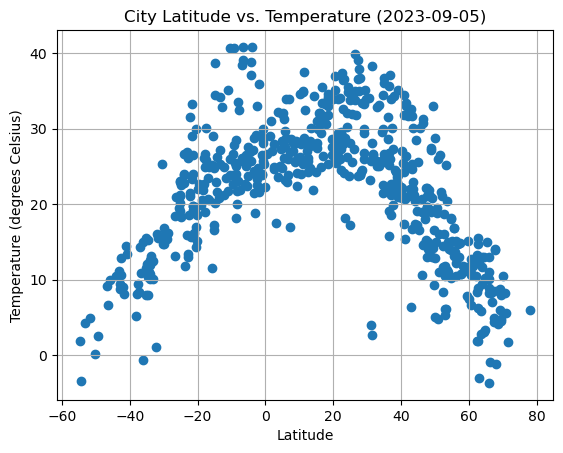

In [23]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"])

# Incorporate the other graph properties
plt.title("City Latitude vs. Temperature (2023-09-05)")
plt.xlabel("Latitude")
plt.ylabel("Temperature (degrees Celsius)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

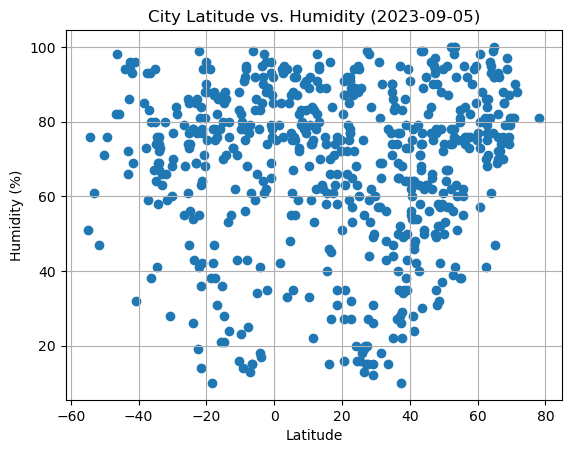

In [24]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"])

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2023-09-05)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

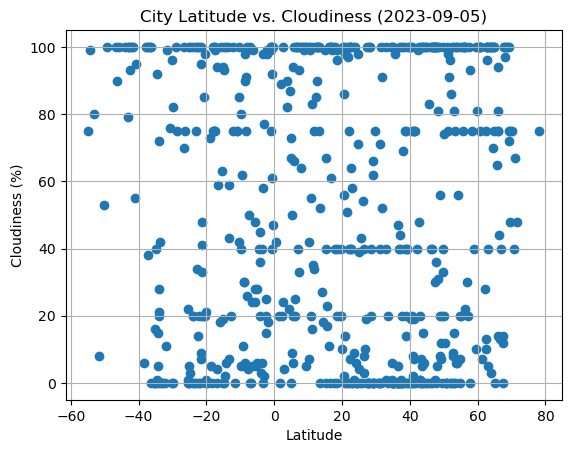

In [25]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"])

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2023-09-05)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

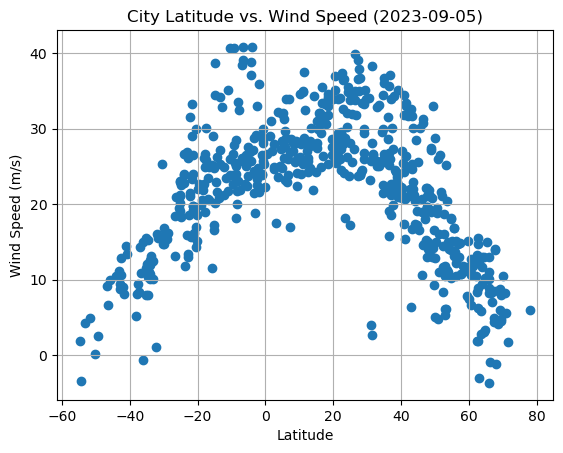

In [26]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"])

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2023-09-05)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [79]:
# Define a function to create Linear Regression plots
def linear_reg_plot(x,y):
    # Linear regression model
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    plt.scatter(x,y)    
    plt.plot(x, regress_values, "r-")
    plt.annotate(line_eq,(0,50), fontsize=15, color="red")
    print(f"The r-value is: {rvalue}")
    

In [80]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[(city_data_df['Lat'] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bethel,41.3712,-73.4140,33.05,64,75,2.06,US,1693939459
2,stanley,54.8680,-1.6985,18.07,83,0,3.09,GB,1693939511
5,baiyin,36.5583,104.2081,19.05,69,5,2.19,CN,1693940036
6,thompson,55.7435,-97.8558,13.09,62,75,5.14,CA,1693939342
7,petropavlovsk-kamchatsky,53.0452,158.6483,5.33,100,0,2.00,RU,1693939604


In [81]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[(city_data_df['Lat'] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,chonchi,-42.6128,-73.8092,10.56,96,100,2.92,CL,1693939736
3,port-aux-francais,-49.3500,70.2167,2.51,76,100,14.33,TF,1693939494
4,mineiros,-17.5694,-52.5511,30.16,38,99,2.39,BR,1693940035
11,waitangi,-43.9535,-176.5597,10.46,94,100,0.45,NZ,1693939466
13,ushuaia,-54.8000,-68.3000,1.81,51,75,1.03,AR,1693939291


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.7388132166203875


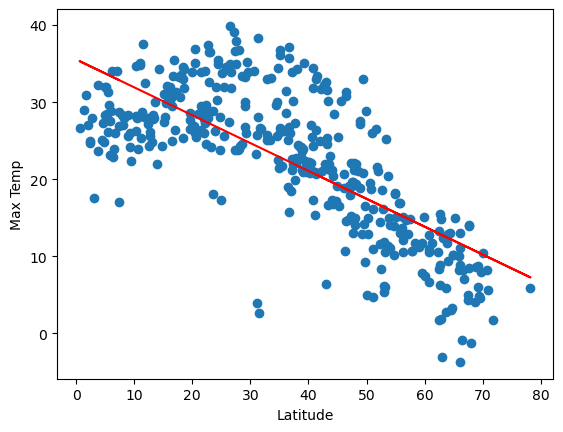

In [82]:
# Linear regression on Northern Hemisphere
linear_reg_plot(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'])
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.show()

The r-value is: 0.7915369311961096


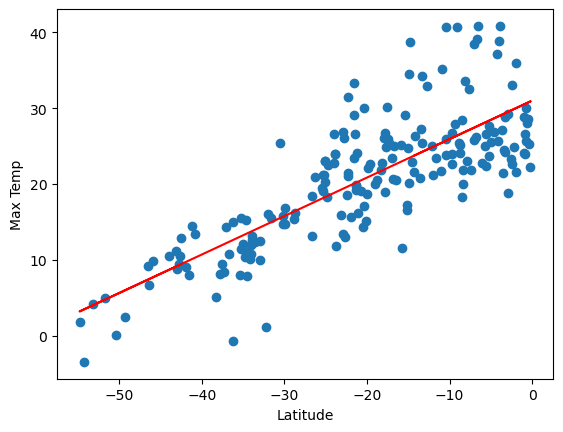

In [83]:
# Linear regression on Southern Hemisphere
linear_reg_plot(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'])
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.show()

**Discussion about the linear relationship:** It is observed that there is a strong linear correlation between the latitude and maximum temperature of a city. As the latitude of the city increases in the northern hemisphere (going further away from the equator), the temperature decreases, therefore it has a positive strong correlation. The exact opposite is observed for the southern hemisphere. As the latitude of the city in the southern hemisphere increases (goes towards the equator), the max temperature increases. This makes sense since the tempeature is hotter by the equator and gets colder the farther away from it.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.12347830983959297


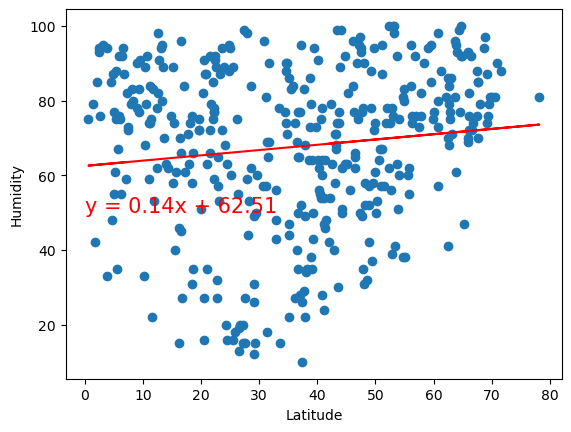

In [85]:
# Northern Hemisphere
linear_reg_plot(northern_hemi_df['Lat'], northern_hemi_df['Humidity'])
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.show()

The r-value is: 0.0002808747046324607


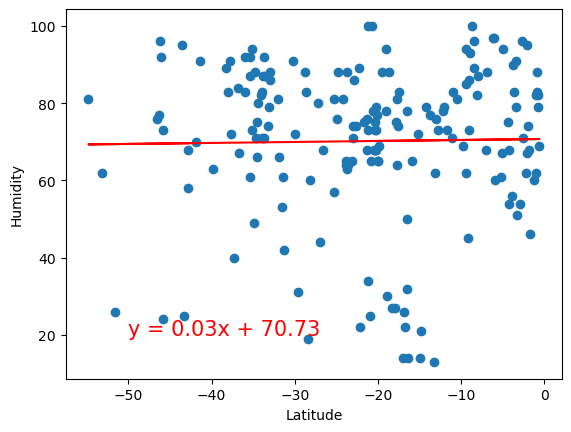

In [18]:
# Southern Hemisphere
linear_reg_plot(southern_hemi_df['Lat'], southern_hemi_df['Humidity'])
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.show()

**Discussion about the linear relationship:** The northern hemisphere linear regression shows a very weak correlation between latitude and humidity since there are data points all over the plot. The observation is also made for the southern hemisphere, which has almost no correlation between latitude and humidity.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.04122952988623117


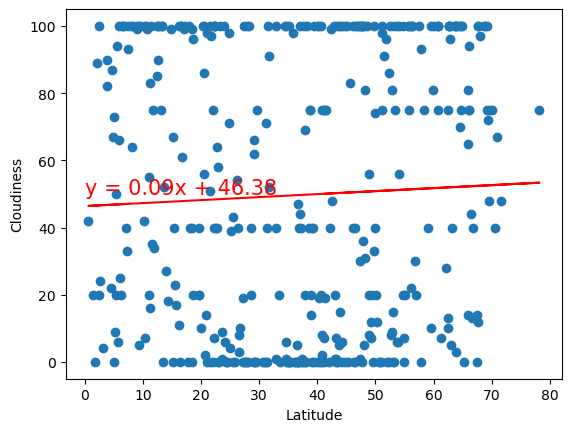

In [86]:
# Northern Hemisphere
linear_reg_plot(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'])
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.show()

The r-value is: -0.09849972070487434


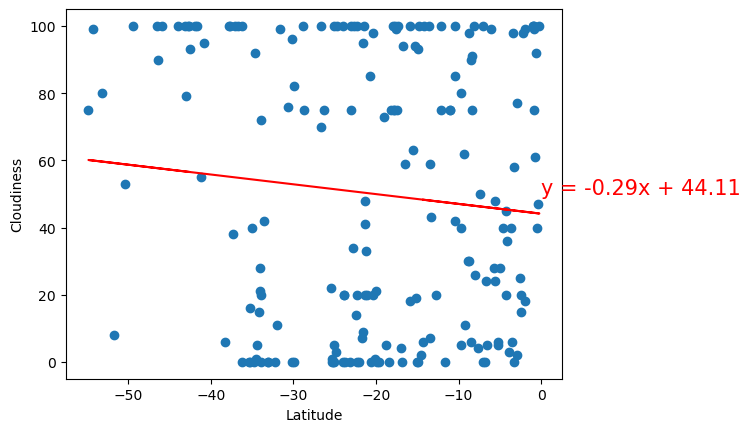

In [87]:
# Southern Hemisphere
linear_reg_plot(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'])
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.show()

**Discussion about the linear relationship:** The northern hemisphere regression displays a very weak correlation between cloudiness and latitude, indicating cloudiness is not dependant on distance from equator. The southern hemisphere has weak negative correlation between cloudiness and latidude, indicating there is a small dependancy on distance from equator for the cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.04275426255496022


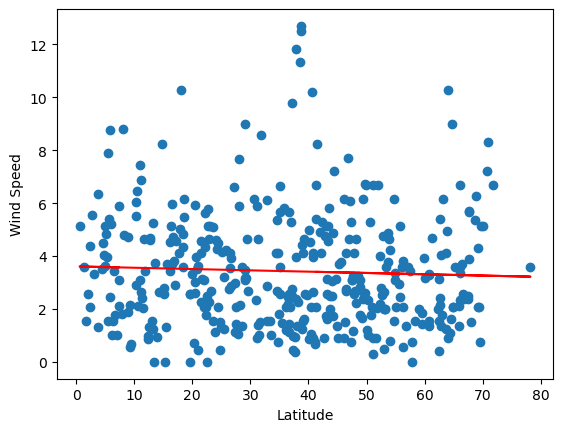

In [88]:
# Northern Hemisphere
linear_reg_plot(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'])
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.show()

The r-value is: -0.15050755732452656


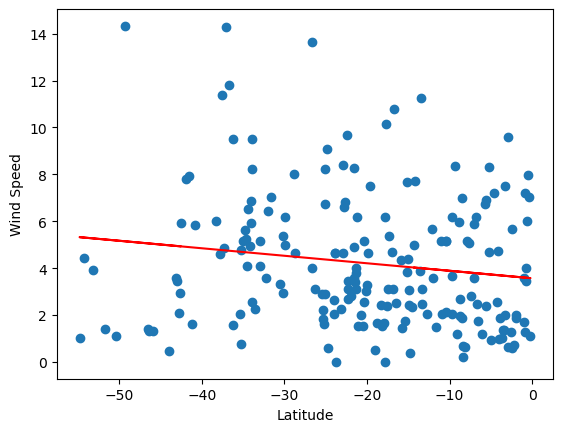

In [89]:
# Southern Hemisphere
linear_reg_plot(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'])
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.show()

**Discussion about the linear relationship:** There is a very weak to almost no correlation between wind speed and latitude for both northern and southern hemisphere. This indicates wind speed is not dependant on the latitude of the city.